In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.patches import Ellipse
from matplotlib.patches import Rectangle, Arrow, FancyArrowPatch
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [2]:
# Parameters for matplotlib (these should be the same as the ones used for SHD)
fontsize = 20
matplotlib.rcParams.update({
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize, #* 2,
    "xtick.labelsize": fontsize,
    "ytick.labelsize": fontsize,
    "xtick.major.size": fontsize * .8,
    "ytick.major.size": fontsize * .8,
    "legend.fontsize": fontsize,
    #"font.family": "Times new Roman",
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "text.usetex": True,
    "path.simplify": True,
    "figure.figsize": (8, 6)
})

plt.rcParams["figure.facecolor"] = "w"


# Class to deal in an easy way with number of digits in colorbars (used for ULs and sigma maps)
class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
            def __init__(self, fformat="%1.1f", offset=True, mathText=True):
                self.fformat = fformat
                matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
            def _set_format(self):
                self.format = self.fformat
                if self._useMathText:
                    #self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
                    self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)

(-1.0, 1.0) (-1.0, 1.0)


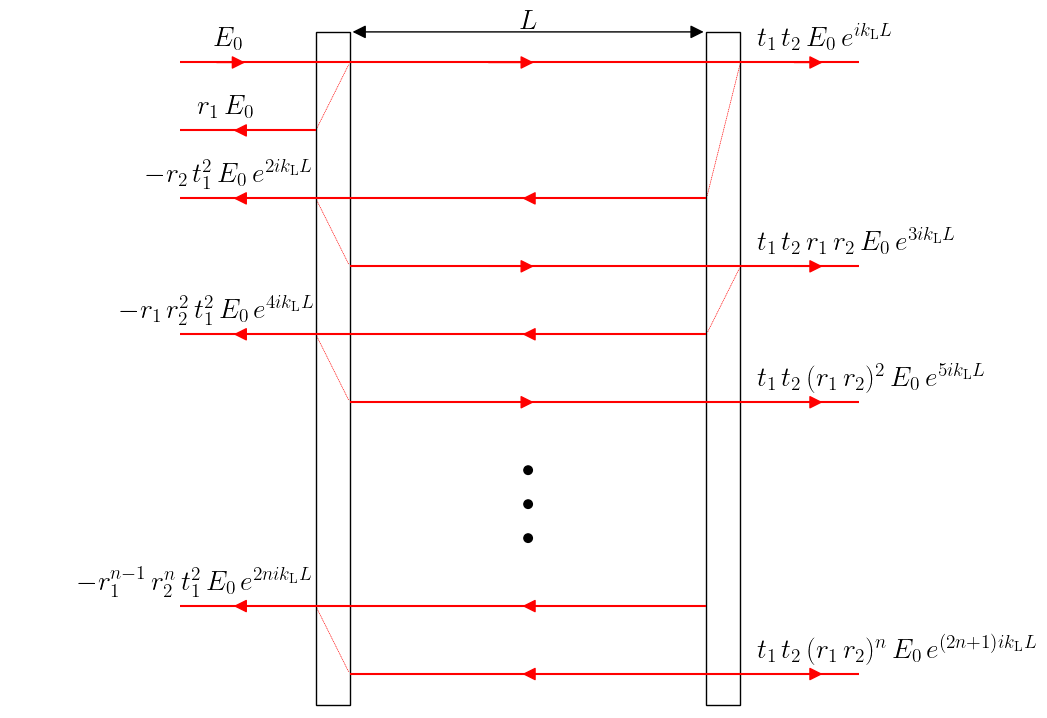

In [4]:
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize = (12,9))

xmax = 1
ymax = 1
ax.set_xlim(-xmax, xmax)
ax.set_ylim(-ymax, ymax)
print(ax.get_xlim(), ax.get_ylim())

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

#Eliminate ticks
plt.tick_params(left = False, bottom = False, labelleft=False, labelbottom = False)

origin = (0, 0)

left_mirror = (-0.6*xmax,-0.99*ymax)
right_mirror = (0.55*xmax,-0.99*ymax)
mirror_width = 0.1*xmax
mirror_height = 2*0.99*ymax

rect_left = Rectangle(left_mirror, mirror_width, mirror_height, color = "black", fill = False)
ax.add_artist(rect_left)

rect_right = Rectangle(right_mirror, mirror_width, mirror_height, color = "black", fill = False)
ax.add_artist(rect_right)

plt.hlines(0.9*ymax, *ax.get_xlim(), color = "red")
plt.hlines(0.7*ymax, -xmax, left_mirror[0], color = "red")
plt.hlines(0.5*ymax, -xmax, right_mirror[0], color = "red")
plt.hlines(0.3*ymax, left_mirror[0] + mirror_width, xmax, color = "red")
plt.hlines(0.1*ymax, -xmax, right_mirror[0], color = "red")
plt.hlines(-0.1*ymax, left_mirror[0] + mirror_width, xmax, color = "red")

plt.hlines(-0.7*ymax, -xmax, right_mirror[0], color = "red")
plt.hlines(-0.9*ymax, left_mirror[0] + mirror_width, xmax, color = "red")


ax.set_xlim(-1.5*xmax, xmax)
start_Erefl_x = -xmax*1.3
start_Etrans_x = right_mirror[0]+mirror_width+0.05*xmax


ax.annotate("",
            xy=(-0.9*xmax+0.1*xmax, 0.9*ymax), xycoords='data',
            xytext=(-0.9*xmax, 0.9*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate(r"$E_{0}$",
            (start_Erefl_x+0.4*xmax, 0.95*ymax), textcoords='data',
            )



ax.annotate("",
            xy=(0.05, 0.9*ymax), xycoords='data',
            xytext=(-0.1*xmax, 0.9*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate("",
            xy=(0.9*xmax, 0.9*ymax), xycoords='data',
            xytext=(0.8*xmax, 0.9*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate(r"$t_{1}\,t_{2}\,E_{0}\, e^{ik_{\mathrm{L}}L}$",
            (start_Etrans_x, 0.95*ymax), textcoords='data',
            )

ax.annotate("",
            xy=(-0.8*xmax, 0.7*ymax), xycoords='data',
            xytext=(-0.85*xmax, 0.7*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate(r"$r_{1}\,E_{0}$",
            (start_Erefl_x+0.35*xmax, 0.75*ymax), textcoords='data',
            )

ax.annotate("",
            xy=(-0.8*xmax, 0.5*ymax), xycoords='data',
            xytext=(-0.85*xmax, 0.5*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate(r"$-r_{2}\,t_{1}^{2}\,E_{0}\,e^{2ik_{\mathrm{L}}L}$",
            (start_Erefl_x+0.2*xmax, 0.55*ymax), textcoords='data',
            )

ax.annotate("",
            xy=(0.05*xmax, 0.5*ymax), xycoords='data',
            xytext=(0, 0.5*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate("",
            xy=(0.05*xmax, 0.3*ymax), xycoords='data',
            xytext=(-0.1*xmax, 0.3*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate("",
            xy=(0.9*xmax, 0.3*ymax), xycoords='data',
            xytext=(0.8*xmax, 0.3*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate(r"$t_{1}\,t_{2}\,r_{1}\,r_{2}\,E_{0}\, e^{3ik_{\mathrm{L}}L}$",
            (start_Etrans_x, 0.35*ymax), textcoords='data',
            )

ax.annotate("",
            xy=(0.05*xmax, 0.1*ymax), xycoords='data',
            xytext=(0, 0.1*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate("",
            xy=(-0.8*xmax, 0.1*ymax), xycoords='data',
            xytext=(-0.85*xmax, 0.1*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate(r"$-r_{1}\,r_{2}^{2}\,t_{1}^{2}\,E_{0}\,e^{4ik_{\mathrm{L}}L}$",
            (start_Erefl_x+0.125, 0.15*ymax), textcoords='data',
            )

ax.annotate("",
            xy=(0.9*xmax, -0.1*ymax), xycoords='data',
            xytext=(0.8*xmax, -0.1*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )
ax.annotate(r"$t_{1}\,t_{2}\,(r_{1}\,r_{2})^{2}\,E_{0}\, e^{5ik_{\mathrm{L}}L}$",
            (start_Etrans_x, -0.05*ymax), textcoords='data',
            )


ax.annotate("",
            xy=(0.05*xmax, -0.1*ymax), xycoords='data',
            xytext=(-0.1*xmax, -0.1*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate("",
            xy=(0.05*xmax, -0.7*ymax), xycoords='data',
            xytext=(0, -0.7*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate("",
            xy=(-0.8*xmax, -0.7*ymax), xycoords='data',
            xytext=(-0.85*xmax, -0.7*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate(r"$-r_{1}^{n-1}\,r_{2}^{n}\,t_{1}^{2}\,E_{0}\,e^{2nik_{\mathrm{L}}L}$",
            (start_Erefl_x, -0.65*ymax), textcoords='data',
            )

ax.annotate("",
            xy=(0.9*xmax, -0.9*ymax), xycoords='data',
            xytext=(0.8*xmax, -0.9*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )

ax.annotate(r"$t_{1}\,t_{2}\,(r_{1}\,r_{2})^{n}\,E_{0}\, e^{(2n+1)ik_{\mathrm{L}}L}$",
            (start_Etrans_x, -0.85*ymax), textcoords='data',
            )

ax.annotate("",
            xy=(0.05*xmax, -0.9*ymax), xycoords='data',
            xytext=(0, -0.9*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="<|-",
                            connectionstyle="arc3", color='r', lw=1), zorder = -1,
            )




ax.annotate("",
            xy=(left_mirror[0]+mirror_width, 0.99*ymax), xycoords='data',
            xytext=(right_mirror[0], 0.99*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="<|-|>",
                            connectionstyle="arc3", color='k', lw=1), zorder = -1,
            )

ax.annotate("",
            xy=(left_mirror[0]+mirror_width, 0.9*ymax), xycoords='data',
            xytext=(left_mirror[0], 0.7*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='r', lw=0.5, linestyle = "dotted"), zorder = -1,
            )

ax.annotate("",
            xy=(right_mirror[0]+mirror_width, 0.9*ymax), xycoords='data',
            xytext=(right_mirror[0], 0.5*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='r', lw=0.5, linestyle = "dotted"), zorder = -1,
            )

ax.annotate("",
            xy=(left_mirror[0], 0.5*ymax), xycoords='data',
            xytext=(left_mirror[0]+mirror_width, 0.3*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='r', lw=0.5, linestyle = "dotted"), zorder = -1,
            )

ax.annotate("",
            xy=(right_mirror[0]+mirror_width, 0.3*ymax), xycoords='data',
            xytext=(right_mirror[0], 0.1*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='r', lw=0.5, linestyle = "dotted"), zorder = -1,
            )

ax.annotate("",
            xy=(left_mirror[0], 0.1*ymax), xycoords='data',
            xytext=(left_mirror[0]+mirror_width, -0.1*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='r', lw=0.5, linestyle = "dotted"), zorder = -1,
            )

ax.annotate("",
            xy=(left_mirror[0], -0.7*ymax), xycoords='data',
            xytext=(left_mirror[0]+mirror_width, -0.9*ymax), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3", color='r', lw=0.5, linestyle = "dotted"), zorder = -1,
            )

ax.annotate("$L$", (0.0, ymax), textcoords='data')

ellipse = Ellipse((0.025*xmax, -0.3*ymax), 0.025*xmax, 0.025*ymax, angle=0., fill = True, color = "black")
ax.add_artist(ellipse)

ellipse = Ellipse((0.025*xmax, -0.4*ymax), 0.025*xmax, 0.025*ymax, angle=0., fill = True, color = "black")
ax.add_artist(ellipse)

ellipse = Ellipse((0.025*xmax, -0.5*ymax), 0.025*xmax, 0.025*ymax, angle=0., fill = True, color = "black")
ax.add_artist(ellipse)

plt.savefig("./Fabry_Perot_electric_field.pdf", bbox_inches="tight")
plt.show()